In [2]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `~/SSD/Code/TinyMPC/julia/quadrotor_quat/Project.toml`


In [3]:
using LinearAlgebra
using BlockDiagonals
using ForwardDiff
using Plots
using Random; 
using Printf

In [74]:
Pkg.add("Symbolics")

    Updating registry at `~/.julia/registries/General`


    Updating git-repo `https://github.com/JuliaRegistries/General`


   Resolving package versions...


   Installed DEDataArrays ──────────── v0.2.4
   Installed PreallocationTools ────── v0.3.2
   Installed Static ────────────────── v0.4.1
   Installed ArrayInterface ────────── v3.2.2
   Installed MultivariatePolynomials ─ v0.3.18
   Installed SparseDiffTools ───────── v1.21.0
   Installed Symbolics ─────────────── v4.3.0


   Installed FastBroadcast ─────────── v0.1.17
   Installed MicroCollections ──────── v0.1.4
   Installed ThreadsX ──────────────── v0.1.11
   Installed Polyester ─────────────── v0.6.12
   Installed DiffEqBase ────────────── v6.84.0


   Installed Latexify ──────────────── v0.15.20


   Installed GR_jll ────────────────── v0.72.2+0
   Installed TimerOutputs ──────────── v0.5.23


   Installed DynamicPolynomials ────── v0.3.21
   Installed StrideArraysCore ──────── v0.3.17
   Installed ControlSystemsBase ────── v1.4.2
   Installed DelayDiffEq ───────────── v5.37.0


   Installed OrdinaryDiffEq ────────── v6.11.2


   Installed GR ────────────────────── v0.72.2


    Updating `~/SSD/Code/TinyMPC/julia/quadrotor_quat/Project.toml`
  [0c5d862f] + Symbolics v4.3.0


    Updating `~/SSD/Code/TinyMPC/julia/quadrotor_quat/Manifest.toml`
  [1520ce14] + AbstractTrees v0.4.4
  [dce04be8] + ArgCheck v2.3.0
  [4fba245c] ↓ ArrayInterface v6.0.25 ⇒ v3.2.2
  [015c0d05] - ArrayInterfaceOffsetArrays v0.1.7
  [b0d46f97] - ArrayInterfaceStaticArrays v0.1.5
  [15f4f7f2] + AutoHashEquals v0.2.0
  [198e06fe] + BangBang v0.3.37
  [9718e550] + Baselet v0.1.1
  [e2ed5e7c] + Bijections v0.1.4
  [861a8166] + Combinatorics v1.0.2
  [34da2185] ↓ Compat v4.6.1 ⇒ v3.46.2
  [b152e2b5] + CompositeTypes v0.1.3
  [a33af91c] + CompositionsBase v0.1.1
  [aaaaaaaa] ↑ ControlSystemsBase v1.4.1 ⇒ v1.4.2
  [754358af] + DEDataArrays v0.2.4
  [244e2a9f] + DefineSingletons v0.1.2
  [bcd4f6db] ↓ DelayDiffEq v5.41.1 ⇒ v5.37.0
  [2b5f629d] ↓ DiffEqBase v6.108.0 ⇒ v6.84.0
  [5b8099bc] + DomainSets v0.5.15
  [7c1d4256] + DynamicPolynomials v0.3.21
  [7034ab61] ↓ FastBroadcast v0.2.4 ⇒ v0.1.17
  [28b8d3ca] ↑ GR v0.72.0 ⇒ v0.72.2
  [22cec73e] + InitialValues v0.3.1
  [8197267c] + IntervalSets 

Precompiling 

project...


  ✓ DefineSingletons


  ✓ CompositionsBase


  ✓ AutoHashEquals
  ✓ TermInterface


  ✓ InitialValues


  ✓ Static


  ✓ Referenceables


  ✓ Baselet


  ✓ BitTwiddlingConvenienceFunctions


  ✓ Setfield


  ✓ TimerOutputs


  ✓ CPUSummary


  ✓ HostCPUFeatures


  ✓ ArrayInterface


  ✓ Latexify


  ✓ PolyesterWeave


  ✓ GR_jll


  ✓ SplittablesBase


  ✓ CloseOpenIntervals


  ✓ LayoutPointers


  ✓ FiniteDiff


  ✓ DomainSets


  ✓ StrideArraysCore


  ✓ MultivariatePolynomials


  ✓ LabelledArrays


  ✓ Polyester


  ✓ GR


  ✓ DynamicPolynomials


  ✓ FastBroadcast


  ✓ BangBang


  ✓ MicroCollections


  ✓ Transducers


  ✓ DEDataArrays


  ✓ ThreadsX


  ✓ NLSolversBase


  ✓ Metatheory


  ✓ VectorizationBase


  ✓ SLEEFPirates


  ✓ PreallocationTools


  ✓ SparseDiffTools


  ✓ LineSearches


  ✓ NLsolve


  ✓ SIMDDualNumbers


  ✓ RobotDynamics


  ✓ SymbolicUtils


  ✗ RobotZoo


  ✓ TrajectoryOptimization


  ✓ ControlSystemsBase


  ✓ LoopVectorization


  ✓ TriangularSolve


  ✓ TrajOptPlots


  ✓ Symbolics


  ✓ RecursiveFactorization


  ✓ NonlinearSolve


  ✓ DiffEqBase


  ✓ Plots


  ✓ LinearSolve


  ✓ DiffEqCallbacks


  ✓ OrdinaryDiffEq


  ✓ DelayDiffEq


  ✓ ControlSystems


  60 dependencies successfully precompiled in 373 seconds (252 already precompiled)
  3 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package


In [4]:
#Quaternion stuff
function hat(v)
    return [0 -v[3] v[2];
            v[3] 0 -v[1];
            -v[2] v[1] 0]
end
function L(q)
    s = q[1]
    v = q[2:4]
    L = [s    -v';
         v  s*I+hat(v)]
    return L
end
T = Diagonal([1; -ones(3)])
H = [zeros(1,3); I]
function qtoQ(q)
    return H'*T*L(q)*T*L(q)*H
end
function G(q)
    G = L(q)*H
end
function rptoq(ϕ)
    (1/sqrt(1+ϕ'*ϕ))*[1; ϕ]
end
function qtorp(q)
    q[2:4]/q[1]
end
function E(q)
    E = BlockDiagonal([1.0*I(3), G(q), 1.0*I(6)])
end

E (generic function with 1 method)

In [7]:
#Quadrotor parameters
m = 0.03
ℓ = 0.046
J = [16.6e-6 0.83e-6 0.72e-6;
    0.83e-6 16.6e-6 1.8e-6;
    0.72e-6 1.8e-6 29.3e-6];
g = 9.81
thrustToTorque = 0.005964552
ℓ = 0.046/sqrt(2)
scale = 65535
kt = 2.245365e-6*scale # u is PWM in range [0...1]
km = kt*thrustToTorque #4.4733e-8


h = 1/50 #50 Hz

Nx = 13     # number of states (quaternion)
Nx̃ = 12     # number of states (linearized)
Nu = 4     # number of controls
Tfinal = 5.0 # final time
Nt = Int(Tfinal/h)+1    # number of time steps
t_vec = h*(0:Nt-1)
thist = Array(range(0,h*(Nt-1), step=h));

# Cost weights
Q = Diagonal([10; 10; 10; 1; 1; 1; 1; 1; 1; 0.1; 0.1; 0.1]);
R = Array(I(Nu));

In [9]:
function quad_dynamics(x,u)
  r = x[1:3]
  q = x[4:7]/norm(x[4:7]) #normalize q just to be careful
  v = x[8:10]
  ω = x[11:13]
  Q = qtoQ(q)
  
  ṙ = Q*v
  q̇ = 0.5*L(q)*H*ω
  
  v̇ = Q'*[0; 0; -g] + (1/m)*[zeros(2,4); kt*ones(1,4)]*u - hat(ω)*v
  
  ω̇ = J\(-hat(ω)*J*ω + [0 ℓ*kt 0 -ℓ*kt; -ℓ*kt 0 ℓ*kt 0; km -km km -km]*u)
  
  return [ṙ; q̇; v̇; ω̇]
end
function quad_dynamics_rk4(x,u)
  #RK4 integration with zero-order hold on u
  f1 = quad_dynamics(x, u)
  f2 = quad_dynamics(x + 0.5*h*f1, u)
  f3 = quad_dynamics(x + 0.5*h*f2, u)
  f4 = quad_dynamics(x + h*f3, u)
  xn = x + (h/6.0)*(f1 + 2*f2 + 2*f3 + f4)
  xn[4:7] .= xn[4:7]/norm(xn[4:7]) #re-normalize quaternion
  return xn
end

quad_dynamics_rk4 (generic function with 1 method)

In [10]:
#Goal state
uhover = (0.5)*ones(4)  # m = 30g and max thrust = 60g
rg = [0.0; 0; 1.0]
qg = [1.0; 0; 0; 0]
vg = zeros(3)
ωg = zeros(3)
xg = [rg; qg; vg; ωg];

In [11]:
#Linearize dynamics about hover
A = ForwardDiff.jacobian(x->quad_dynamics_rk4(x,uhover),xg)
B = ForwardDiff.jacobian(u->quad_dynamics_rk4(xg,u),uhover);
Ã = Array(E(qg)'*A*E(qg))
B̃ = Array(E(qg)'*B);
function discrete_dynamics(params,x,u,k)
  Ã*x + B̃*u
end

discrete_dynamics (generic function with 1 method)

In [12]:
#LQR Controller
# K = dlqr(Ã,B̃,Q,R)
#Feedback controller
function controller_lqr(x, k)
    
  q0 = x0[4:7]
  q = x[4:7]
  ϕ = qtorp(L(q0)'*q)
  
  Δx̃ = [x[1:3]-r0; ϕ; x[8:10]-v0; x[11:13]-ω0]
  
  u = uhover - K*Δx̃
end

controller_lqr (generic function with 1 method)

ΔJ = 0.1911404284519449
ΔJ = 0.0014625348327115262
iter     J           ΔJ        |d|         α        reg         ρ
---------------------------------------------------------------------


  1    1.826e+02   1.46e-03   0.00e+00  1.0000    1.00e-08    1.00e+00
convio = 1.6043310341723225
ΔJ = 1.8598503799654225
ΔJ = 

0.024387962680890496
ΔJ = 5.24100188954435e-5
  2    1.841e+02   5.24e-05   0.00e+00  1.0000    1.00e-08    1.00e+01
convio = 0.7060063451704344
ΔJ = 

5.935820538235248


ΔJ = 0.2474578985688538
ΔJ = 

0.001813627494271941
  3    1.856e+02   1.81e-03   0.00e+00  1.0000    1.00e-08    1.00e+02
convio = 0.13252599693328415
ΔJ = 1.4469450408027171
ΔJ = 1.213909732465737


ΔJ = 0.0
  4    1.859e+02   0.00e+00   0.00e+00  1.0000    1.00e-08    1.00e+03
convio = 0.015241783629975636
ΔJ = 0.3683842776898132
ΔJ = 0.0
  5    1.860e+02   0.00e+00   0.00e+00  1.0000    1.00e-08    1.00e+04
convio = 0.0015583379667549746
ΔJ = 

0.03888479434331771
ΔJ = 0.0
  6    1.860e+02   0.00e+00   0.00e+00  1.0000    1.00e-08    1.00e+05
convio = 0.0001561865913703997
ΔJ = 

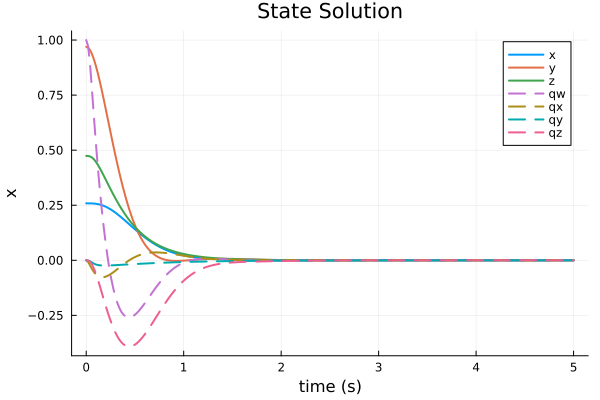

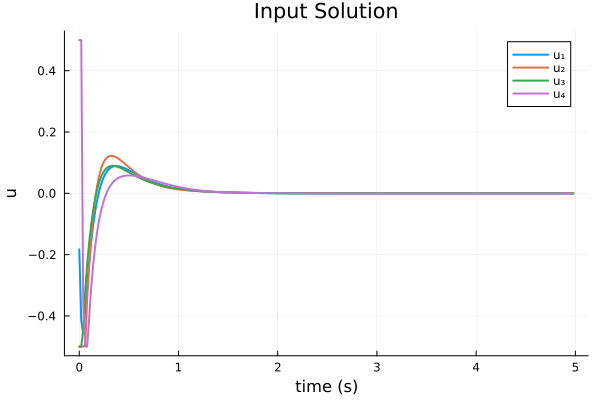

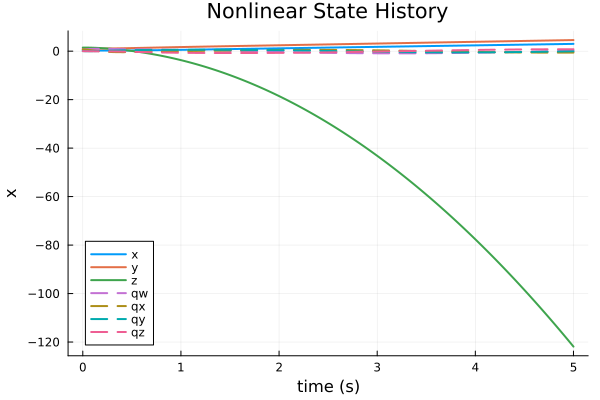

0.003909926653051343
  7    1.860e+02   3.91e-03   0.00e+00  1.0000    1.00e-08    1.00e+06
convio = 1.562115862818736e-5


In [13]:
#Feedback hovering controller
include("tinyMPC.jl")
nx = Nx̃
nu = Nu
N = Nt
dt = h

Δx̃g = zeros(nx)
Xref = [deepcopy(Δx̃g) for i = 1:N]
Uref = [zeros(nu) for i = 1:N-1]

u_min = -1*uhover
u_max =  1*uhover

x_min = -100.0*ones(nx)
x_min[1:7] .= -.8
x_max = 100.0*ones(nx)
x_max[1:7] .= 1.0

max_inner_iters = 10  # MAX RICCATI SOLVING ITERATION
ncx = 2*nx*0
ncu = 2*nu*1
ncg = 1
ncu_cone = nu*0; 
cone_scale = 1e-3  # very fragile for each problem

μ = [zeros(ncu) for i = 1:N-1]   # input constraints
μx = [zeros(ncx) for i = 1:N]    # state constraints
λ = zeros(nx)    # goal constraint
λc = [zeros(ncu_cone) for i = 1:N-1]   # goal constraint
A_cone = [1 0 0; 0 1 0]
c_cone = [0.0, 0.0, tand(0)]

params = (
    nx = nx, nu = nu, ncx = ncx, ncu = ncu, ncg = ncg, ncu_cone = ncu_cone,
    μ = μ, μx = μx, λ = λ, λc = λc,
    A_cone = A_cone, c_cone = c_cone,
    N = N, Q = Q, R = R, Qf = 10*Q,
    u_min = u_min, u_max = u_max,
    x_min = x_min, x_max = x_max,
    Xref = Xref, Uref = Uref, dt = dt,
);

# previous MPC iterate
X = [zeros(nx) for i = 1:N]
U = [ones(nu) for k = 1:N-1]
# new MPC iterate
Xn = deepcopy(X)
Un = deepcopy(U)

P = [zeros(nx,nx) for i = 1:N]   # cost to go quadratic term
p = [zeros(nx) for i = 1:N]      # cost to go linear term
d = [zeros(nu) for i = 1:N-1]    # feedforward control
K = [zeros(nu,nx) for i = 1:N-1] # feedback gain

Random.seed!(12);
x = [rg+rand(3); L(qg)*rptoq([1; 0; 0]); vg; ωg];
q = x[4:7]
ϕ = qtorp(L(qg)'*q)    
Δx̃ = [x[1:3]-rg; ϕ; x[8:10]-vg; x[11:13]-ωg]
X[1] .= Δx̃
u = mpc!(params,X,U,P,p,K,d,Xn,Un; atol=1e-4,max_iters=20,verbose=true,ρ=1e0,ρ_max=1e10, ϕ=10.0)

# Open-loop Simulation
xhist = zeros(Nx,N)
xhist[:,1] = x
for k = 1:(N-1)
    xhist[:,k+1] = quad_dynamics_rk4(xhist[:,k],Un[k])
end

# Plots
Xsim_m = mat_from_vec(Xn)
Usim_m = mat_from_vec(Un)
display(plot(t_vec,Xsim_m[1:7,:]',label=["x" "y" "z" "qw" "qx" "qy" "qz"],
linestyle=[:solid :solid :solid :dash :dash :dash :dash], linewidth=[2 2 2 2 2 2 2],
             title="State Solution", xlabel="time (s)", ylabel="x"))
display(plot(t_vec[1:end-1],Usim_m',label=["u₁" "u₂" "u₃" "u₄"],
             title="Input Solution", linewidth=[2 2 2 2 2 2 2],
             xlabel="time (s)", ylabel="u"))
display(plot(t_vec,xhist[1:7,:]',label=["x" "y" "z" "qw" "qx" "qy" "qz"],
linestyle=[:solid :solid :solid :dash :dash :dash :dash], linewidth=[2 2 2 2 2 2 2],
             title="Nonlinear State History", xlabel="time (s)", ylabel="x"))             

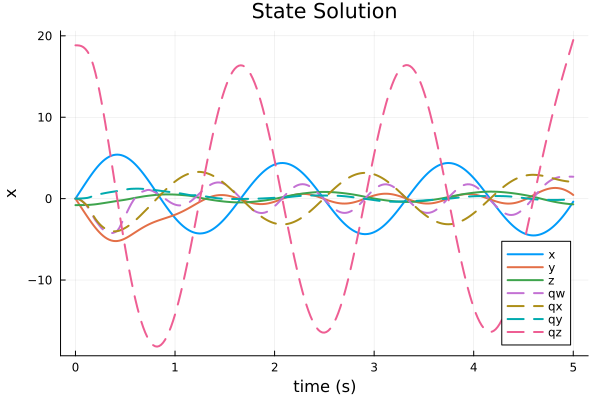

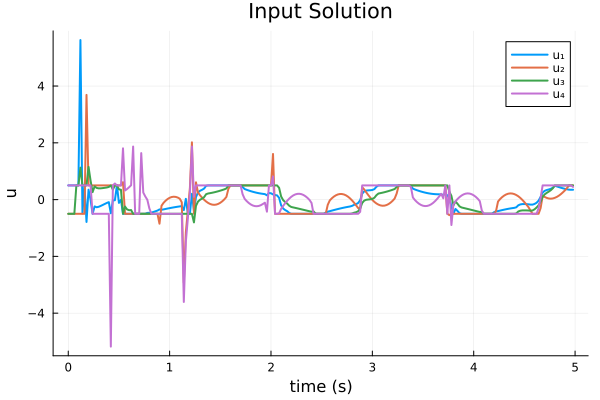

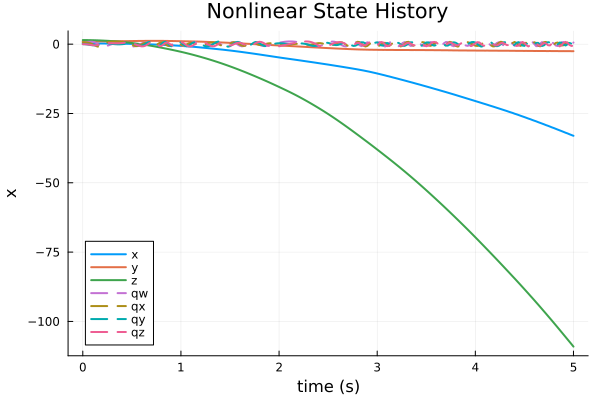

MAX PENALTY


In [15]:
#Feedback tracking controller
include("tinyMPC.jl")
nx = Nx̃
nu = Nu
N = Nt
dt = h

# Δx̃g = zeros(nx)
# Xref = [deepcopy(Δx̃g) for i = 1:N]
Δx̃ref = [zeros(nx) for i = 1:Nt]
Uref = [zeros(nu) for i = 1:Nt-1]
Xref = [[5*cos(t);5*cos(t)*sin(t);1.2+sin(t);1;zeros(9)] for t = range(-pi/2, 3*pi/2 + 4*pi, length = Nt)]
for i = 1:Nt-1
    Xref[i][8:10] = (Xref[i+1][1:3] - Xref[i][1:3])/dt
end
for k = 1:Nt
    rref = Xref[k][1:3]
    qref = Xref[k][4:7]
    vref = Xref[k][8:10]
    ωref = Xref[k][11:13]
    ϕ = qtorp(L(qg)'*qref)    
    Δx̃ref[k] .= [-xg[1:3]+rref; ϕ; -xg[8:10]+vref; -xg[11:13]+ωref]
end
u_min = -uhover
u_max =  uhover

# state is x y v θ
x_min = -ones(nx)
x_max = ones(nx)

max_inner_iters = 10  # MAX RICCATI SOLVING ITERATION
ncx = 2*nx*0
ncu = 2*nu*1
ncg = 0
ncu_cone = nu*0; 
cone_scale = 1e-3  # very fragile for each problem

μ = [zeros(ncu) for i = 1:N-1]   # input constraints
μx = [zeros(ncx) for i = 1:N]    # state constraints
λ = zeros(nx)    # goal constraint
λc = [zeros(ncu_cone) for i = 1:N-1]   # goal constraint
A_cone = [1 0 0; 0 1 0]
c_cone = [0.0, 0.0, tand(0)]

params = (
    nx = nx, nu = nu, ncx = ncx, ncu = ncu, ncg = ncg, ncu_cone = ncu_cone,
    μ = μ, μx = μx, λ = λ, λc = λc,
    A_cone = A_cone, c_cone = c_cone,
    N = N, Q = 10*Q, R = R, Qf = 10*Q,
    u_min = u_min, u_max = u_max,
    x_min = x_min, x_max = x_max,
    Xref = Δx̃ref, Uref = Uref, dt = dt,
);

# previous MPC iterate
X = [zeros(nx) for i = 1:N]
U = [zeros(nu) for k = 1:N-1]
# new MPC iterate
Xn = deepcopy(X)
Un = deepcopy(U)

P = [zeros(nx,nx) for i = 1:N]   # cost to go quadratic term
p = [zeros(nx) for i = 1:N]      # cost to go linear term
d = [zeros(nu) for i = 1:N-1]    # feedforward control
K = [zeros(nu,nx) for i = 1:N-1] # feedback gain

X[1] .= Δx̃ref[1]
u = mpc!(params,X,U,P,p,K,d,Xn,Un; atol=1e-4,max_iters=20,verbose=false,ρ=1e0,ρ_max=1e10, ϕ=10.0)

# Open-loop Simulation
xhist = zeros(Nx,N)
xhist[:,1] = x
for k = 1:(N-1)
    xhist[:,k+1] = quad_dynamics_rk4(xhist[:,k],Un[k])
end

# Plots
Xsim_m = mat_from_vec(Xn)
Usim_m = mat_from_vec(Un)
display(plot(t_vec,Xsim_m[1:7,:]',label=["x" "y" "z" "qw" "qx" "qy" "qz"],
linestyle=[:solid :solid :solid :dash :dash :dash :dash], linewidth=[2 2 2 2 2 2 2],
             title="State Solution", xlabel="time (s)", ylabel="x"))
display(plot(t_vec[1:end-1],Usim_m',label=["u₁" "u₂" "u₃" "u₄"],
             title="Input Solution", linewidth=[2 2 2 2 2 2 2],
             xlabel="time (s)", ylabel="u"))
display(plot(t_vec,xhist[1:7,:]',label=["x" "y" "z" "qw" "qx" "qy" "qz"],
linestyle=[:solid :solid :solid :dash :dash :dash :dash], linewidth=[2 2 2 2 2 2 2],
             title="Nonlinear State History", xlabel="time (s)", ylabel="x"))   

In [16]:
#Feedback tracking controller
include("tinyMPC.jl")
nx = Nx̃
nu = Nu
N = 10
dt = h
Tfinal = 10.0 # final time
Nt = Int(Tfinal/h)+1    # number of time steps
t_vec = h*(0:Nt-1)

#Create trajectory to follow
Xref = [[0;0;1;1;zeros(9)] for i = 1:Nt+N]
Δx̃ref = [zeros(nx) for i = 1:Nt+N]
Uref = [zeros(nu) for i = 1:Nt+N-1]

# Number-eight
Xref = [[1*cos(t)*sin(t);1*cos(t);1;1;zeros(9)] for t = range(0, 2*pi + 1*pi/4, length = Nt+N)]  

# Triangle
# p0 = [0; 0; 1.0]; p1 = [2; 3; 2.]; p2 = [0; 6; 2.]; p3 = [0; -2; 1.0]
# range1 = collect(LinRange(p0, p1, round(Int,(Nt+N)/3)))
# range2 = collect(LinRange(p1, p2, round(Int,(Nt+N)/3)))
# range3 = collect(LinRange(p2, p3, round(Int,(Nt+N)/3)+1))
# range123 = [range1; range2; range3]
# for k = 1:Nt+N
#     Xref[k][1:3] .= range123[k]
# end

for i = 1:Nt+N-1
    Xref[i][8:10] = (Xref[i+1][1:3] - Xref[i][1:3])/dt
end
for k = 1:Nt+N
    x = Xref[k]
    q = x[4:7]
    ϕ = qtorp(L(qg)'*q)   
    Δx̃ref[k] .= [x[1:3]-rg; ϕ; x[8:10]-vg; x[11:13]-ωg]
end

u_min = -1*uhover
u_max =  1*uhover

# state is x y v θ
x_min = -100*ones(nx)
x_min[3] = -0.3
x_max = 100*ones(nx)
x_max[3] = 0.3

ncx = 2*nx*0
ncu = 2*nu*0
ncg = 0
ncu_cone = nu*0; 
cone_scale = 1e-3  # very fragile for each problem

μ = [zeros(ncu) for i = 1:N-1]   # input constraints
μx = [zeros(ncx) for i = 1:N]    # state constraints
λ = zeros(nx)    # goal constraint
λc = [zeros(ncu_cone) for i = 1:N-1]   # goal constraint
A_cone = [1 0 0; 0 1 0]
c_cone = [0.0, 0.0, tand(0)]

params = (
    nx = nx, nu = nu, ncx = ncx, ncu = ncu, ncg = ncg, ncu_cone = ncu_cone,
    μ = μ, μx = μx, λ = λ, λc = λc,
    A_cone = A_cone, c_cone = c_cone,
    N = N, Q = 10*Q, R = R, Qf = 10*Q,
    u_min = u_min, u_max = u_max,
    x_min = x_min, x_max = x_max,
    Xref = Δx̃ref, Uref = Uref, dt = dt,
);
    
# previous MPC iterate
X = [zeros(nx) for i = 1:N]
U = [zeros(nu) for k = 1:N-1]
# new MPC iterate
Xn = deepcopy(X)
Un = deepcopy(U)
    
P = [zeros(nx,nx) for i = 1:N]   # cost to go quadratic term
p = [zeros(nx) for i = 1:N]      # cost to go linear term
d = [zeros(nu) for i = 1:N-1]    # feedforward control
K = [zeros(nu,nx) for i = 1:N-1] # feedback gain

function controller_mpc(params, x, k)
    q = x[4:7]
    ϕ = qtorp(L(qg)'*q)
    
    Δx̃ = [x[1:3]-rg; ϕ; x[8:10]-vg; x[11:13]-ωg]
    X[1] .= Δx̃
    # u = mpc_JuMP(optimizer, params, X, U, Ã, B̃, 0.0; warm_start=true)
    u = mpc!(params,X,U,P,p,K,d,Xn,Un; atol=1e-2,max_iters=20,max_inner_iters=5,verbose=false,ρ=1e0,ρ_max=1e6, ϕ=10.0)
    return u + uhover
end

controller_mpc (generic function with 1 method)

In [17]:
#Simulation
uhist = [zeros(Nu) for i in 1:Nt-1]
xhist = [zeros(Nx) for i in 1:Nt]
Random.seed!(12);
# xhist[1] .= [rg+randn(3); L(qg)*rptoq([1; 0; 0]); vg; ωg]  # initial conditions
xhist[1] .= Xref[1]
# xhist[1] .= Xref[1]; xhist[1][1:3] += rand(3)*0.2
for k = 1:(Nt-1)
    params1 = (; params..., Uref = Uref[k:N+k-1], Xref = Δx̃ref[k:N+k])  # update ref
    shift_fill(U)
    @time uhist[k] = controller_mpc(params1, xhist[k], k)
    uhist[k] = clamp.(uhist[k], (uhover+u_min)[1], (uhover+u_max)[1])
    xhist[k+1] = quad_dynamics_rk4(xhist[k],uhist[k]) 
end

  3.303698 seconds (10.94 M allocations: 645.173 MiB, 5.61% gc time, 99.90% compilation time)


  0.001015 seconds (1.90 k allocations: 592.875 KiB)
  0.001084 seconds (1.90 k allocations: 592.875 KiB)
  0.001095 seconds (1.90 k allocations: 592.875 KiB)
  0.001201 seconds (1.90 k allocations: 592.875 KiB)
  0.001275 seconds (1.90 k allocations: 592.875 KiB)
  0.008000 seconds (1.90 k allocations: 592.875 KiB)
  0.008226 seconds (1.90 k allocations: 592.875 KiB)
  0.003663 seconds (1.90 k allocations: 592.875 KiB)
  0.002775 seconds (1.90 k allocations: 592.875 KiB)
  0.003002 seconds (1.90 k allocations: 592.875 KiB)
  0.009052 seconds (1.90 k allocations: 592.875 KiB)
  0.001649 seconds (1.90 k allocations: 592.875 KiB)
  0.002709 seconds (1.90 k allocations: 592.875 KiB)
  0.004523 seconds (1.90 k allocations: 592.875 KiB)
  0.004498 seconds (1.90 k allocations: 592.875 KiB)
  0.004629 seconds (1.90 k allocations: 592.875 KiB)
  0.001350 seconds (1.90 k allocations: 592.875 KiB)
  0.012432 seconds (1.90 k allocations: 592.875 KiB)
  0.001439 seconds (1.90 k allocations: 592.87

  0.001276 seconds (1.90 k allocations: 592.875 KiB)
  0.008746 seconds (1.90 k allocations: 592.875 KiB)
  0.002273 seconds (1.90 k allocations: 592.875 KiB)
  0.001300 seconds (1.90 k allocations: 592.875 KiB)
  0.006312 seconds (1.90 k allocations: 592.875 KiB)
  0.008445 seconds (1.90 k allocations: 592.875 KiB)
  0.001549 seconds (1.90 k allocations: 592.875 KiB)
  0.001292 seconds (1.90 k allocations: 592.875 KiB)
  0.010513 seconds (1.90 k allocations: 592.875 KiB)
  0.014276 seconds (1.90 k allocations: 592.875 KiB)
  0.002032 seconds (1.90 k allocations: 592.875 KiB)
  0.006595 seconds (1.90 k allocations: 592.875 KiB)
  0.004856 seconds (1.90 k allocations: 592.875 KiB)
  0.005906 seconds (1.90 k allocations: 592.875 KiB)
  0.001397 seconds (1.90 k allocations: 592.875 KiB)
  0.001358 seconds (1.90 k allocations: 592.875 KiB)


  0.032971 seconds (1.90 k allocations: 592.875 KiB)
  0.007439 seconds (1.90 k allocations: 592.875 KiB)
  0.003312 seconds (1.90 k allocations: 592.875 KiB)
  0.046133 seconds (1.90 k allocations: 592.875 KiB)
  0.016499 seconds (1.90 k allocations: 592.875 KiB)
  0.001626 seconds (1.90 k allocations: 592.875 KiB)
  0.001867 seconds (1.90 k allocations: 592.875 KiB)


  0.029658 seconds (1.90 k allocations: 592.875 KiB)
  0.035649 seconds (1.90 k allocations: 592.875 KiB)
  0.020636 seconds (1.90 k allocations: 592.875 KiB)
  0.008891 seconds (1.90 k allocations: 592.875 KiB)
  0.001605 seconds (1.90 k allocations: 592.875 KiB)


  0.033387 seconds (1.90 k allocations: 592.875 KiB)
  0.012734 seconds (1.90 k allocations: 592.875 KiB)
  0.008601 seconds (1.90 k allocations: 592.875 KiB)
  0.006930 seconds (1.90 k allocations: 592.875 KiB)
  0.022177 seconds (1.90 k allocations: 592.875 KiB)
  0.003788 seconds (1.90 k allocations: 592.875 KiB)
  0.004598 seconds (1.90 k allocations: 592.875 KiB)
  0.005875 seconds (1.90 k allocations: 592.875 KiB)
  0.006823 seconds (1.90 k allocations: 592.875 KiB)


  0.024264 seconds (1.90 k allocations: 592.875 KiB)
  0.004509 seconds (1.90 k allocations: 592.875 KiB)
  0.007395 seconds (1.90 k allocations: 592.875 KiB)
  0.024246 seconds (1.90 k allocations: 592.875 KiB)
  0.013587 seconds (1.90 k allocations: 592.875 KiB)
  0.021457 seconds (1.90 k allocations: 592.875 KiB)
  0.010677 seconds (1.90 k allocations: 592.875 KiB)
  0.010276 seconds (1.90 k allocations: 592.875 KiB)
  0.001682 seconds (1.90 k allocations: 592.875 KiB)


  0.001427 seconds (1.90 k allocations: 592.875 KiB)
  0.003441 seconds (1.90 k allocations: 592.875 KiB)
  0.001641 seconds (1.90 k allocations: 592.875 KiB)
  0.010901 seconds (1.90 k allocations: 592.875 KiB)
  0.004681 seconds (1.90 k allocations: 592.875 KiB)
  0.003496 seconds (1.90 k allocations: 592.875 KiB)
  0.001713 seconds (1.90 k allocations: 592.875 KiB)
  0.001543 seconds (1.90 k allocations: 592.875 KiB)
  0.001412 seconds (1.90 k allocations: 592.875 KiB)
  0.001388 seconds (1.90 k allocations: 592.875 KiB)
  0.010576 seconds (1.90 k allocations: 592.875 KiB)
  0.002910 seconds (1.90 k allocations: 592.875 KiB)
  0.001682 seconds (1.90 k allocations: 592.875 KiB)
  0.004351 seconds (1.90 k allocations: 592.875 KiB)
  0.006712 seconds (1.90 k allocations: 592.875 KiB)
  0.003632 seconds (1.90 k allocations: 592.875 KiB)
  0.004348 seconds (1.90 k allocations: 592.875 KiB)
  0.015617 seconds (1.90 k allocations: 592.875 KiB)
  0.005441 seconds (1.90 k allocations: 592.87

  0.001373 seconds (1.90 k allocations: 592.875 KiB)
  0.004587 seconds (1.90 k allocations: 592.875 KiB)
  0.004354 seconds (1.90 k allocations: 592.875 KiB)
  0.001391 seconds (1.90 k allocations: 592.875 KiB)
  0.001522 seconds (1.90 k allocations: 592.875 KiB)
  0.017206 seconds (1.90 k allocations: 592.875 KiB)
  0.001910 seconds (1.90 k allocations: 592.875 KiB)
  0.020561 seconds (1.90 k allocations: 592.875 KiB)
  0.033874 seconds (1.90 k allocations: 592.875 KiB)
  0.003529 seconds (1.90 k allocations: 592.875 KiB)
  0.001487 seconds (1.90 k allocations: 592.875 KiB)
  0.001307 seconds (1.90 k allocations: 592.875 KiB)


  0.001304 seconds (1.90 k allocations: 592.875 KiB)
  0.001295 seconds (1.90 k allocations: 592.875 KiB)
  0.004044 seconds (1.90 k allocations: 592.875 KiB)
  0.004684 seconds (1.90 k allocations: 592.875 KiB)
  0.049868 seconds (1.90 k allocations: 592.875 KiB)
  0.001490 seconds (1.90 k allocations: 592.875 KiB)
  0.001464 seconds (1.90 k allocations: 592.875 KiB)
  0.001348 seconds (1.90 k allocations: 592.875 KiB)
  0.001496 seconds (1.90 k allocations: 592.875 KiB)
  0.003314 seconds (1.90 k allocations: 592.875 KiB)
  0.003692 seconds (1.90 k allocations: 592.875 KiB)
  0.001832 seconds (1.90 k allocations: 592.875 KiB)
  0.001595 seconds (1.90 k allocations: 592.875 KiB)
  0.001350 seconds (1.90 k allocations: 592.875 KiB)
  0.001344 seconds (1.90 k allocations: 592.875 KiB)
  0.003575 seconds (1.90 k allocations: 592.875 KiB)
  0.001389 seconds (1.90 k allocations: 592.875 KiB)
  0.004161 seconds (1.90 k allocations: 592.875 KiB)
  0.001342 seconds (1.90 k allocations: 592.87

  0.001315 seconds (1.90 k allocations: 592.875 KiB)
  0.001681 seconds (1.90 k allocations: 592.875 KiB)
  0.003218 seconds (1.90 k allocations: 592.875 KiB)
  0.004515 seconds (1.90 k allocations: 592.875 KiB)
  0.074476 seconds (1.90 k allocations: 592.875 KiB)


  0.080152 seconds (1.90 k allocations: 592.875 KiB)
  0.005118 seconds (1.90 k allocations: 592.875 KiB)
  0.000739 seconds (1.90 k allocations: 592.875 KiB)
  0.000818 seconds (1.90 k allocations: 592.875 KiB)
  0.005646 seconds (1.90 k allocations: 592.875 KiB)
  0.000635 seconds (1.90 k allocations: 592.875 KiB)
  0.000649 seconds (1.90 k allocations: 592.875 KiB)
  0.003028 seconds (1.90 k allocations: 592.875 KiB)
  0.021127 seconds (1.90 k allocations: 592.875 KiB)
  0.013277 seconds (1.90 k allocations: 592.875 KiB)
  0.005964 seconds (1.90 k allocations: 592.875 KiB)
  0.004884 seconds (1.90 k allocations: 592.875 KiB)


  0.224052 seconds (1.90 k allocations: 592.875 KiB, 98.59% gc time)
  0.002504 seconds (1.90 k allocations: 592.875 KiB)
  0.001061 seconds (1.90 k allocations: 592.875 KiB)
  0.001336 seconds (1.90 k allocations: 592.875 KiB)
  0.001010 seconds (1.90 k allocations: 592.875 KiB)
  0.001004 seconds (1.90 k allocations: 592.875 KiB)
  0.000959 seconds (1.90 k allocations: 592.875 KiB)
  0.001291 seconds (1.90 k allocations: 592.875 KiB)
  0.052562 seconds (1.90 k allocations: 592.875 KiB)
  0.009216 seconds (1.90 k allocations: 592.875 KiB)
  0.003426 seconds (1.90 k allocations: 592.875 KiB)
  0.010423 seconds (1.90 k allocations: 592.875 KiB)
  0.001039 seconds (1.90 k allocations: 592.875 KiB)
  0.000898 seconds (1.90 k allocations: 592.875 KiB)
  0.000897 seconds (1.90 k allocations: 592.875 KiB)
  0.000895 seconds (1.90 k allocations: 592.875 KiB)
  0.004314 seconds (1.90 k allocations: 592.875 KiB)


  0.000908 seconds (1.90 k allocations: 592.875 KiB)
  0.002610 seconds (1.90 k allocations: 592.875 KiB)
  0.001406 seconds (1.90 k allocations: 592.875 KiB)
  0.042338 seconds (1.90 k allocations: 592.875 KiB)
  0.001003 seconds (1.90 k allocations: 592.875 KiB)
  0.015506 seconds (1.90 k allocations: 592.875 KiB)
  0.000980 seconds (1.90 k allocations: 592.875 KiB)
  0.003692 seconds (1.90 k allocations: 592.875 KiB)
  0.001060 seconds (1.90 k allocations: 592.875 KiB)
  0.001152 seconds (1.90 k allocations: 592.875 KiB)
  0.000946 seconds (1.90 k allocations: 592.875 KiB)
  0.000904 seconds (1.90 k allocations: 592.875 KiB)
  0.000937 seconds (1.90 k allocations: 592.875 KiB)
  0.003149 seconds (1.90 k allocations: 592.875 KiB)
  0.001554 seconds (1.90 k allocations: 592.875 KiB)
  0.003384 seconds (1.90 k allocations: 592.875 KiB)
  0.001369 seconds (1.90 k allocations: 592.875 KiB)
  0.001107 seconds (1.90 k allocations: 592.875 KiB)
  0.001002 seconds (1.90 k allocations: 592.87

  0.003474 seconds (1.90 k allocations: 592.875 KiB)
  0.001606 seconds (1.90 k allocations: 592.875 KiB)
  0.001137 seconds (1.90 k allocations: 592.875 KiB)
  0.001002 seconds (1.90 k allocations: 592.875 KiB)
  0.000907 seconds (1.90 k allocations: 592.875 KiB)
  0.000944 seconds (1.90 k allocations: 592.875 KiB)
  0.000988 seconds (1.90 k allocations: 592.875 KiB)
  0.002718 seconds (1.90 k allocations: 592.875 KiB)
  0.017754 seconds (1.90 k allocations: 592.875 KiB)
  0.004917 seconds (1.90 k allocations: 592.875 KiB)
  0.001105 seconds (1.90 k allocations: 592.875 KiB)
  0.001021 seconds (1.90 k allocations: 592.875 KiB)
  0.002136 seconds (1.90 k allocations: 592.875 KiB)
  0.003274 seconds (1.90 k allocations: 592.875 KiB)
  0.001427 seconds (1.90 k allocations: 592.875 KiB)
  0.004891 seconds (1.90 k allocations: 592.875 KiB)
  0.000952 seconds (1.90 k allocations: 592.875 KiB)
  0.001016 seconds (1.90 k allocations: 592.875 KiB)
  0.001198 seconds (1.90 k allocations: 592.87

  0.003721 seconds (1.90 k allocations: 592.875 KiB)
  0.001191 seconds (1.90 k allocations: 592.875 KiB)
  0.001295 seconds (1.90 k allocations: 592.875 KiB)
  0.003018 seconds (1.90 k allocations: 592.875 KiB)
  0.003207 seconds (1.90 k allocations: 592.875 KiB)
  0.002022 seconds (1.90 k allocations: 592.875 KiB)
  0.006247 seconds (1.90 k allocations: 592.875 KiB)
  0.001052 seconds (1.90 k allocations: 592.875 KiB)
  0.008022 seconds (1.90 k allocations: 592.875 KiB)
  0.003661 seconds (1.90 k allocations: 592.875 KiB)
  0.001395 seconds (1.90 k allocations: 592.875 KiB)
  0.001111 seconds (1.90 k allocations: 592.875 KiB)
  0.001930 seconds (1.90 k allocations: 592.875 KiB)
  0.001039 seconds (1.90 k allocations: 592.875 KiB)
  0.003516 seconds (1.90 k allocations: 592.875 KiB)
  0.006754 seconds (1.90 k allocations: 592.875 KiB)
  0.010456 seconds (1.90 k allocations: 592.875 KiB)
  0.009122 seconds (1.90 k allocations: 592.875 KiB)


  0.027356 seconds (1.90 k allocations: 592.875 KiB, 58.87% gc time)
  0.001166 seconds (1.90 k allocations: 592.875 KiB)
  0.000922 seconds (1.90 k allocations: 592.875 KiB)
  0.000988 seconds (1.90 k allocations: 592.875 KiB)
  0.000941 seconds (1.90 k allocations: 592.875 KiB)
  0.000932 seconds (1.90 k allocations: 592.875 KiB)
  0.003098 seconds (1.90 k allocations: 592.875 KiB)
  0.000945 seconds (1.90 k allocations: 592.875 KiB)
  0.047896 seconds (1.90 k allocations: 592.875 KiB)
  0.008412 seconds (1.90 k allocations: 592.875 KiB)
  0.001136 seconds (1.90 k allocations: 592.875 KiB)
  0.002174 seconds (1.90 k allocations: 592.875 KiB)
  0.004031 seconds (1.90 k allocations: 592.875 KiB)
  0.011208 seconds (1.90 k allocations: 592.875 KiB)
  0.004022 seconds (1.90 k allocations: 592.875 KiB)
  0.000978 seconds (1.90 k allocations: 592.875 KiB)


  0.003219 seconds (1.90 k allocations: 592.875 KiB)
  0.001559 seconds (1.90 k allocations: 592.875 KiB)
  0.000954 seconds (1.90 k allocations: 592.875 KiB)
  0.000930 seconds (1.90 k allocations: 592.875 KiB)
  0.000949 seconds (1.90 k allocations: 592.875 KiB)
  0.001003 seconds (1.90 k allocations: 592.875 KiB)
  0.002724 seconds (1.90 k allocations: 592.875 KiB)
  0.000903 seconds (1.90 k allocations: 592.875 KiB)
  0.015861 seconds (1.90 k allocations: 592.875 KiB)
  0.024252 seconds (1.90 k allocations: 592.875 KiB)
  0.000962 seconds (1.90 k allocations: 592.875 KiB)
  0.006436 seconds (1.90 k allocations: 592.875 KiB)
  0.003258 seconds (1.90 k allocations: 592.875 KiB)
  0.005859 seconds (1.90 k allocations: 592.875 KiB)
  0.000992 seconds (1.90 k allocations: 592.875 KiB)
  0.003362 seconds (1.90 k allocations: 592.875 KiB)
  0.000932 seconds (1.90 k allocations: 592.875 KiB)
  0.005203 seconds (1.90 k allocations: 592.875 KiB)
  0.000975 seconds (1.90 k allocations: 592.87

  0.001635 seconds (1.90 k allocations: 592.875 KiB)
  0.001169 seconds (1.90 k allocations: 592.875 KiB)
  0.001031 seconds (1.90 k allocations: 592.875 KiB)
  0.000914 seconds (1.90 k allocations: 592.875 KiB)
  0.000946 seconds (1.90 k allocations: 592.875 KiB)
  0.003151 seconds (1.90 k allocations: 592.875 KiB)
  0.001018 seconds (1.90 k allocations: 592.875 KiB)
  0.071919 seconds (1.90 k allocations: 592.875 KiB)
  0.002219 seconds (1.90 k allocations: 592.875 KiB)
  0.002530 seconds (1.90 k allocations: 592.875 KiB)
  0.001204 seconds (1.90 k allocations: 592.875 KiB)
  0.004455 seconds (1.90 k allocations: 592.875 KiB)


  0.020880 seconds (1.90 k allocations: 592.875 KiB)
  0.001014 seconds (1.90 k allocations: 592.875 KiB)
  0.008616 seconds (1.90 k allocations: 592.875 KiB)
  0.005376 seconds (1.90 k allocations: 592.875 KiB)
  0.006893 seconds (1.90 k allocations: 592.875 KiB)
  0.002681 seconds (1.90 k allocations: 592.875 KiB)
  0.005805 seconds (1.90 k allocations: 592.875 KiB)
  0.018480 seconds (1.90 k allocations: 592.875 KiB)
  0.003524 seconds (1.90 k allocations: 592.875 KiB)
  0.039668 seconds (1.90 k allocations: 592.875 KiB)


  0.009400 seconds (1.90 k allocations: 592.875 KiB)
  0.004424 seconds (1.90 k allocations: 592.875 KiB)
  0.006448 seconds (1.90 k allocations: 592.875 KiB)
  0.017002 seconds (1.90 k allocations: 592.875 KiB)
  0.003579 seconds (1.90 k allocations: 592.875 KiB)
  0.008277 seconds (1.90 k allocations: 592.875 KiB)
  0.021177 seconds (1.90 k allocations: 592.875 KiB)
  0.001183 seconds (1.90 k allocations: 592.875 KiB)
  0.010698 seconds (1.90 k allocations: 592.875 KiB)
  0.014602 seconds (1.90 k allocations: 592.875 KiB)


  0.011124 seconds (1.90 k allocations: 592.875 KiB)
  0.002278 seconds (1.90 k allocations: 592.875 KiB)
  0.003185 seconds (1.90 k allocations: 592.875 KiB)
  0.007102 seconds (1.90 k allocations: 592.875 KiB)
  0.013705 seconds (1.90 k allocations: 592.875 KiB)
  0.012820 seconds (1.90 k allocations: 592.875 KiB)
  0.013035 seconds (1.90 k allocations: 592.875 KiB)
  0.003724 seconds (1.90 k allocations: 592.875 KiB)
  0.001667 seconds (1.90 k allocations: 592.875 KiB)
  0.021169 seconds (1.90 k allocations: 592.875 KiB)


  0.010780 seconds (1.90 k allocations: 592.875 KiB)
  0.015494 seconds (1.90 k allocations: 592.875 KiB)
  0.004217 seconds (1.90 k allocations: 592.875 KiB)
  0.001077 seconds (1.90 k allocations: 592.875 KiB)
  0.001071 seconds (1.90 k allocations: 592.875 KiB)
  0.001435 seconds (1.90 k allocations: 592.875 KiB)
  0.049441 seconds (1.90 k allocations: 592.875 KiB)


  0.031601 seconds (1.90 k allocations: 592.875 KiB)
  0.001758 seconds (1.90 k allocations: 592.875 KiB)
  0.038991 seconds (1.90 k allocations: 592.875 KiB, 34.45% gc time)
  0.010355 seconds (1.90 k allocations: 592.875 KiB)
  0.003457 seconds (1.90 k allocations: 592.875 KiB)
  0.004760 seconds (1.90 k allocations: 592.875 KiB)
  0.001542 seconds (1.90 k allocations: 592.875 KiB)
  0.001233 seconds (1.90 k allocations: 592.875 KiB)
  0.000950 seconds (1.90 k allocations: 592.875 KiB)
  0.000958 seconds (1.90 k allocations: 592.875 KiB)
  0.003220 seconds (1.90 k allocations: 592.875 KiB)
  0.005393 seconds (1.90 k allocations: 592.875 KiB)
  0.001073 seconds (1.90 k allocations: 592.875 KiB)
  0.001069 seconds (1.90 k allocations: 592.875 KiB)
  0.000953 seconds (1.90 k allocations: 592.875 KiB)
  0.001010 seconds (1.90 k allocations: 592.875 KiB)
  0.000962 seconds (1.90 k allocations: 592.875 KiB)
  0.003034 seconds (1.90 k allocations: 592.875 KiB)
  0.003716 seconds (1.90 k all

  0.001308 seconds (1.90 k allocations: 592.875 KiB)
  0.000926 seconds (1.90 k allocations: 592.875 KiB)
  0.001045 seconds (1.90 k allocations: 592.875 KiB)
  0.011156 seconds (1.90 k allocations: 592.875 KiB)
  0.037875 seconds (1.90 k allocations: 592.875 KiB)
  0.020150 seconds (1.90 k allocations: 592.875 KiB)
  0.002770 seconds (1.90 k allocations: 592.875 KiB)
  0.001287 seconds (1.90 k allocations: 592.875 KiB)
  0.001318 seconds (1.90 k allocations: 592.875 KiB)
  0.001644 seconds (1.90 k allocations: 592.875 KiB)
  0.000949 seconds (1.90 k allocations: 592.875 KiB)
  0.000920 seconds (1.90 k allocations: 592.875 KiB)
  0.001094 seconds (1.90 k allocations: 592.875 KiB)
  0.003043 seconds (1.90 k allocations: 592.875 KiB)
  0.003594 seconds (1.90 k allocations: 592.875 KiB)
  0.001607 seconds (1.90 k allocations: 592.875 KiB)
  0.000915 seconds (1.90 k allocations: 592.875 KiB)
  0.001038 seconds (1.90 k allocations: 592.875 KiB)


  0.000953 seconds (1.90 k allocations: 592.875 KiB)
  0.000972 seconds (1.90 k allocations: 592.875 KiB)
  0.003342 seconds (1.90 k allocations: 592.875 KiB)
  0.002051 seconds (1.90 k allocations: 592.875 KiB)
  0.014715 seconds (1.90 k allocations: 592.875 KiB)
  0.049167 seconds (1.90 k allocations: 592.875 KiB)
  0.004435 seconds (1.90 k allocations: 592.875 KiB)
  0.001348 seconds (1.90 k allocations: 592.875 KiB)
  0.001058 seconds (1.90 k allocations: 592.875 KiB)
  0.001237 seconds (1.90 k allocations: 592.875 KiB)
  0.000924 seconds (1.90 k allocations: 592.875 KiB)
  0.000975 seconds (1.90 k allocations: 592.875 KiB)
  0.003291 seconds (1.90 k allocations: 592.875 KiB)
  0.003716 seconds (1.90 k allocations: 592.875 KiB)
  0.001006 seconds (1.90 k allocations: 592.875 KiB)
  0.001449 seconds (1.90 k allocations: 592.875 KiB)
  0.001539 seconds (1.90 k allocations: 592.875 KiB)


  0.000932 seconds (1.90 k allocations: 592.875 KiB)
  0.000928 seconds (1.90 k allocations: 592.875 KiB)
  0.004042 seconds (1.90 k allocations: 592.875 KiB)
  0.005304 seconds (1.90 k allocations: 592.875 KiB)
  0.026844 seconds (1.90 k allocations: 592.875 KiB)
  0.011634 seconds (1.90 k allocations: 592.875 KiB)
  0.003980 seconds (1.90 k allocations: 592.875 KiB)
  0.005282 seconds (1.90 k allocations: 592.875 KiB)
  0.000650 seconds (1.90 k allocations: 592.875 KiB)
  0.000772 seconds (1.90 k allocations: 592.875 KiB)
  0.000709 seconds (1.90 k allocations: 592.875 KiB)
  0.000608 seconds (1.90 k allocations: 592.875 KiB)
  0.001226 seconds (1.90 k allocations: 592.875 KiB)
  0.004966 seconds (1.90 k allocations: 592.875 KiB)
  0.000503 seconds (1.90 k allocations: 592.875 KiB)
  0.004014 seconds (1.90 k allocations: 592.875 KiB)
  0.000521 seconds (1.90 k allocations: 592.875 KiB)
  0.000770 seconds (1.90 k allocations: 592.875 KiB)
  0.000394 seconds (1.90 k allocations: 592.87

  0.005409 seconds (1.90 k allocations: 592.875 KiB, 87.22% gc time)
  0.002499 seconds (1.90 k allocations: 592.875 KiB)
  0.000503 seconds (1.90 k allocations: 592.875 KiB)
  0.003278 seconds (1.90 k allocations: 592.875 KiB)
  0.000720 seconds (1.90 k allocations: 592.875 KiB)
  0.000486 seconds (1.90 k allocations: 592.875 KiB)
  0.000745 seconds (1.90 k allocations: 592.875 KiB)
  0.000408 seconds (1.90 k allocations: 592.875 KiB)
  0.000453 seconds (1.90 k allocations: 592.875 KiB)
  0.000438 seconds (1.90 k allocations: 592.875 KiB)
  0.000953 seconds (1.90 k allocations: 592.875 KiB)
  0.000672 seconds (1.90 k allocations: 592.875 KiB)
  0.000716 seconds (1.90 k allocations: 592.875 KiB)
  0.000673 seconds (1.90 k allocations: 592.875 KiB)
  0.000733 seconds (1.90 k allocations: 592.875 KiB)
  0.002374 seconds (1.90 k allocations: 592.875 KiB)
  0.000665 seconds (1.90 k allocations: 592.875 KiB)
  0.000611 seconds (1.90 k allocations: 592.875 KiB)
  0.000997 seconds (1.90 k all

  0.033721 seconds (1.90 k allocations: 592.875 KiB)
  0.004328 seconds (1.90 k allocations: 592.875 KiB)
  0.001379 seconds (1.90 k allocations: 592.875 KiB)
  0.000969 seconds (1.90 k allocations: 592.875 KiB)
  0.001028 seconds (1.90 k allocations: 592.875 KiB)
  0.001041 seconds (1.90 k allocations: 592.875 KiB)
  0.001072 seconds (1.90 k allocations: 592.875 KiB)
  0.002724 seconds (1.90 k allocations: 592.875 KiB)
  0.004933 seconds (1.90 k allocations: 592.875 KiB)
  0.038830 seconds (1.90 k allocations: 592.875 KiB)
  0.002982 seconds (1.90 k allocations: 592.875 KiB)
  0.004457 seconds (1.90 k allocations: 592.875 KiB)
  0.003833 seconds (1.90 k allocations: 592.875 KiB)
  0.005196 seconds (1.90 k allocations: 592.875 KiB)
  0.001080 seconds (1.90 k allocations: 592.875 KiB)
  0.001238 seconds (1.90 k allocations: 592.875 KiB)
  0.000925 seconds (1.90 k allocations: 592.875 KiB)
  0.002978 seconds (1.90 k allocations: 592.875 KiB)
  0.000940 seconds (1.90 k allocations: 592.87

  0.005139 seconds (1.90 k allocations: 592.875 KiB)
  0.001058 seconds (1.90 k allocations: 592.875 KiB)
  0.001344 seconds (1.90 k allocations: 592.875 KiB)
  0.000923 seconds (1.90 k allocations: 592.875 KiB)
  0.000917 seconds (1.90 k allocations: 592.875 KiB)
  0.002761 seconds (1.90 k allocations: 592.875 KiB)
  0.000993 seconds (1.90 k allocations: 592.875 KiB)
  0.016699 seconds (1.90 k allocations: 592.875 KiB)
  0.040617 seconds (1.90 k allocations: 592.875 KiB)
  0.001055 seconds (1.90 k allocations: 592.875 KiB)
  0.005529 seconds (1.90 k allocations: 592.875 KiB)
  0.006037 seconds (1.90 k allocations: 592.875 KiB)
  0.001073 seconds (1.90 k allocations: 592.875 KiB)
  0.001378 seconds (1.90 k allocations: 592.875 KiB)
  0.000946 seconds (1.90 k allocations: 592.875 KiB)
  0.000949 seconds (1.90 k allocations: 592.875 KiB)


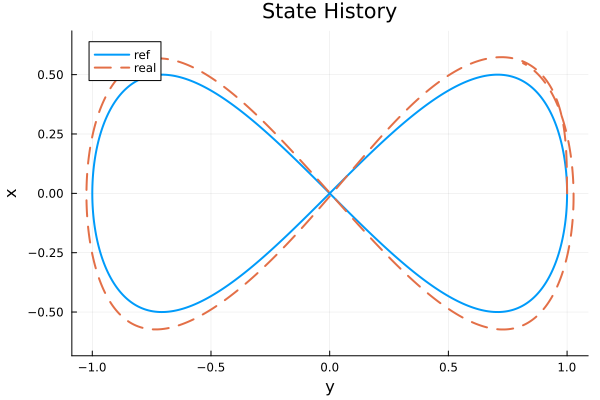

In [18]:
Xsim_m = mat_from_vec(Xref[1:Nt])
plot(Xsim_m[2,:],Xsim_m[1,:],label="ref",
linestyle=:solid, linewidth=2,
             title="State History", xlabel="y", ylabel="x")
Xsim_m = mat_from_vec(xhist[1:Nt])   
display(plot!(Xsim_m[2,:],Xsim_m[1,:],label="real", linestyle=:dash, linewidth=2,
             title="State History", xlabel="y", ylabel="x", aspect_ratio=:equal))

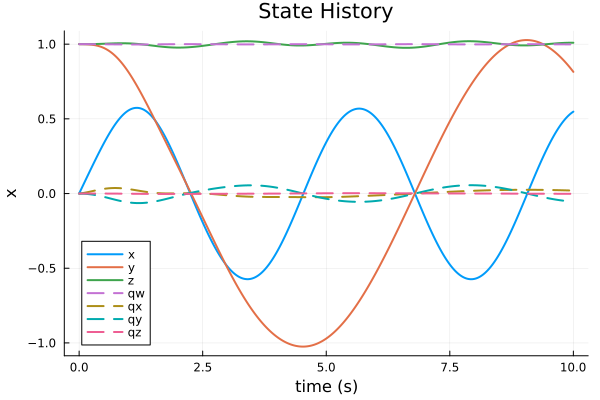

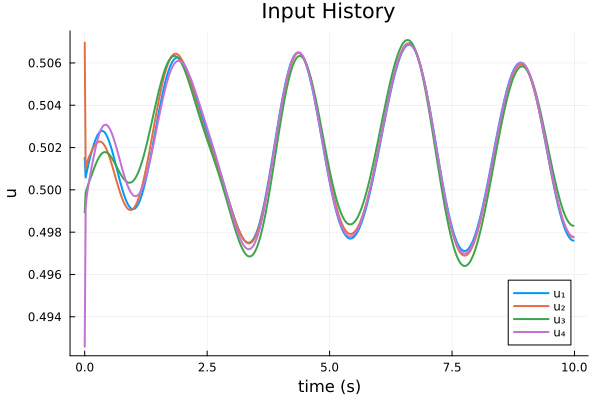

In [19]:
Xsim_m = mat_from_vec(xhist[1:Nt])   
Usim_m = mat_from_vec(uhist[1:Nt-1])   
display(plot(t_vec,Xsim_m[1:7,:]',label=["x" "y" "z" "qw" "qx" "qy" "qz"],
linestyle=[:solid :solid :solid :dash :dash :dash :dash], linewidth=[2 2 2 2 2 2 2],
             title="State History", xlabel="time (s)", ylabel="x"))
display(plot(t_vec[1:end-1],Usim_m',label=["u₁" "u₂" "u₃" "u₄"],
             title="Input History", linewidth=[2 2 2 2 2 2 2],
             xlabel="time (s)", ylabel="u"))

In [34]:
display(Ã)

@printf("FOR C:\n");
str = "sfloat A_data[NSTATES*NSTATES] = {\n"
ÃT = Ã'
for i = 1:Nx̃
  str = str * "  "
  for j = 1:Nx̃
    this_str = @sprintf("%.6f", ÃT[i, j])
    str = str * this_str * "f,"
  end
  str = str * "\n"
end
str = str * "};"
@printf("%s",str)

@printf("\n\nFOR PYTHON:\n");
# Python Language
str = "A = np.array([\n"
for i = 1:Nx̃
  str = str * "  ["
  for j = 1:Nx̃
    # if abs(K[i, j]) < 1e-6
    #   K[i, j] = 0.0
    # end
    this_str = @sprintf("%.6f", Ã[i, j])

    str = str * this_str 
    if j < Nx̃
      str = str * ","
    end
  end
  str = str * "],\n"
end
str = str * "])"
@printf("%s",str)

12×12 Matrix{Float64}:
 1.0  0.0  0.0   0.0       0.003924  0.0  …  0.0    0.0       1.308e-5  0.0
 0.0  1.0  0.0  -0.003924  0.0       0.0     0.0   -1.308e-5  0.0       0.0
 0.0  0.0  1.0   0.0       0.0       0.0     0.02   0.0       0.0       0.0
 0.0  0.0  0.0   1.0       0.0       0.0     0.0    0.01      0.0       0.0
 0.0  0.0  0.0   0.0       1.0       0.0     0.0    0.0       0.01      0.0
 0.0  0.0  0.0   0.0       0.0       1.0  …  0.0    0.0       0.0       0.01
 0.0  0.0  0.0   0.0       0.3924    0.0     0.0    0.0       0.001962  0.0
 0.0  0.0  0.0  -0.3924    0.0       0.0     0.0   -0.001962  0.0       0.0
 0.0  0.0  0.0   0.0       0.0       0.0     1.0    0.0       0.0       0.0
 0.0  0.0  0.0   0.0       0.0       0.0     0.0    1.0       0.0       0.0
 0.0  0.0  0.0   0.0       0.0       0.0  …  0.0    0.0       1.0       0.0
 0.0  0.0  0.0   0.0       0.0       0.0     0.0    0.0       0.0       1.0

FOR C:
sfloat A_data[NSTATES*NSTATES] = {
  1.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,
  0.000000f,1.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,
  0.000000f,0.000000f,1.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,
  0.000000f,-0.003924f,0.000000f,1.000000f,0.000000f,0.000000f,0.000000f,-0.392400f,0.000000f,0.000000f,0.000000f,0.000000f,
  0.003924f,0.000000f,0.000000f,0.000000f,1.000000f,0.000000f,0.392400f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,
  0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,1.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,
  0.020000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,1.000000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,
  0.000000f,0.020000f,0.000000f,0.000000f,0.000000f,0.000000f,0.000000f,1.000000f,0.000000f,0.0



FOR PYTHON:
A = np.array([
  [1.000000,0.000000,0.000000,0.000000,0.003924,0.000000,0.020000,0.000000,0.000000,0.000000,0.000013,0.000000],
  [0.000000,1.000000,0.000000,-0.003924,0.000000,0.000000,0.000000,0.020000,0.000000,-0.000013,0.000000,0.000000],
  [0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000],
  [0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000],
  [0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000],
  [0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000],
  [0.000000,0.000000,0.000000,0.000000,0.392400,0.000000,1.000000,0.000000,0.000000,0.000000,0.001962,0.000000],
  [0.000000,0.000000,0.000000,-0.392400,0.000000,0.000000,0.000000,1.000000,0.000000,-0.001962,0.000000,0.000000],
  [0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [35]:
display(B̃)

@printf("FOR C:\n");
str = "sfloat B_data[NSTATES*NINPUTS] = {\n"
B̃T = B̃'
for i = 1:Nu
  str = str * "  "
  for j = 1:Nx̃
    this_str = @sprintf("%.6f", B̃T[i, j])
    str = str * this_str * "f,"
  end
  str = str * "\n"
end
str = str * "};"
@printf("%s",str)

@printf("\n\nFOR PYTHON:\n");
# Python Language
str = "B = np.array([\n"
for i = 1:Nx̃
  str = str * "  ["
  for j = 1:Nu
    # if abs(K[i, j]) < 1e-6
    #   K[i, j] = 0.0
    # end
    this_str = @sprintf("%.6f", B̃[i, j])

    str = str * this_str 
    if j < Nu
      str = str * ","
    end
  end
  str = str * "],\n"
end
str = str * "])"
@printf("%s",str)

12×4 Matrix{Float64}:
 -1.92367e-5   -6.9131e-7     1.88162e-5    1.11186e-6
 -8.26487e-7   -1.89949e-5    9.76683e-7    1.88448e-5
  0.000981      0.000981      0.000981      0.000981
  0.00126374    0.0290443    -0.0014934    -0.0288146
 -0.0294139    -0.00105705    0.0287709     0.00170009
  0.00477145   -0.00364429    0.00126471   -0.00239188
 -0.00384734   -0.000138262   0.00376323    0.000222372
 -0.000165297  -0.00379899    0.000195337   0.00376895
  0.0981        0.0981        0.0981        0.0981
  0.252748      5.80885      -0.29868      -5.76292
 -5.88278      -0.21141       5.75418       0.340018
  0.95429      -0.728857      0.252942     -0.478376

FOR C:
sfloat B_data[NSTATES*NINPUTS] = {
  -0.000019f,-0.000001f,0.000981f,0.001264f,-0.029414f,0.004771f,-0.003847f,-0.000165f,0.098100f,0.252748f,-5.882783f,0.954290f,
  -0.000001f,-0.000019f,0.000981f,0.029044f,-0.001057f,-0.003644f,-0.000138f,-0.003799f,0.098100f,5.808852f,-0.211410f,-0.728857f,
  0.000019f,0.000001f,0.000981f,-0.001493f,0.028771f,0.001265f,0.003763f,0.000195f,0.098100f,-0.298680f,5.754175f,0.252942f,
  0.000001f,0.000019f,0.000981f,-0.028815f,0.001700f,-0.002392f,0.000222f,0.003769f,0.098100f,-5.762921f,0.340018f,-0.478376f,
};



FOR PYTHON:
B = np.array([
  [-0.000019,-0.000001,0.000019,0.000001],
  [-0.000001,-0.000019,0.000001,0.000019],
  [0.000981,0.000981,0.000981,0.000981],
  [0.001264,0.029044,-0.001493,-0.028815],
  [-0.029414,-0.001057,0.028771,0.001700],
  [0.004771,-0.003644,0.001265,-0.002392],
  [-0.003847,-0.000138,0.003763,0.000222],
  [-0.000165,-0.003799,0.000195,0.003769],
  [0.098100,0.098100,0.098100,0.098100],
  [0.252748,5.808852,-0.298680,-5.762921],
  [-5.882783,-0.211410,5.754175,0.340018],
  [0.954290,-0.728857,0.252942,-0.478376],
])

In [95]:
using Symbolics
@variables x[1:12] u[1:4] 
x = collect(x); u = collect(u)
# ====================
# Generate C code for dynamics
# ====================
function dynamics_rk4_(x,u)
    discrete_dynamics(params,x,u,0)
end
dynamics_rk4 = dynamics_rk4_(x,u)
dynamics_rk4 = build_function(dynamics_rk4, x, u; target=Symbolics.CTarget(), 
    fname = :tiny_Dynamics_RK4_Raw, lhsname=:xn, rhsnames=[Symbol("x"), Symbol("u")])
open("dynamics_rk4.txt","a") do io
        println(io, dynamics_rk4)
end

In [32]:
# Export a vector of vectors to C header and source 
function export_vec_to_c(filename, var_type, var_name, data)
    declare = var_type * " " * var_name
    def = declare * " = {\n"
    for i=1:length(data)
        def = def * "  "
        for j=1:length(data[1])
            def = def * string(data[i][j])
            if j < length(data[1]) 
                def = def * ","
            end
        end
        if i < length(data)
            def = def * ",\n"
        end
    end
    def = def*"}"

    open(filename*".h","a") do io
            println(io, def * ";\n")
    end
    return true
end
export_vec_to_c("data", "sfloat", "X_ref_data", Δx̃ref)

true

In [21]:
Δx̃ref

511-element Vector{Vector{Float64}}:
 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.6929096334854086, -0.004802390660968436, 0.0, 0.0, 0.0, 0.0]
 [0.013858192669708171, 0.9999039521867806, 0.0, 0.0, 0.0, 0.0, 0.6923772394138403, -0.014406249464660181, 0.0, 0.0, 0.0, 0.0]
 [0.027705737457984977, 0.9996158271974874, 0.0, 0.0, 0.0, 0.0, 0.6913128603333488, -0.024007340890841444, 0.0, 0.0, 0.0, 0.0]
 [0.041531994664651954, 0.9991356803796706, 0.0, 0.0, 0.0, 0.0, 0.6897173140549234, -0.03360382061183276, 0.0, 0.0, 0.0, 0.0]
 [0.055326340945750424, 0.9984636039674339, 0.0, 0.0, 0.0, 0.0, 0.6875918265095337, -0.043193845185851565, 0.0, 0.0, 0.0, 0.0]
 [0.0690781774759411, 0.9975997270637169, 0.0, 0.0, 0.0, 0.0, 0.6849380308061946, -0.052775572411117855, 0.0, 0.0, 0.0, 0.0]
 [0.08277693809206499, 0.9965442156154946, 0.0, 0.0, 0.0, 0.0, 0.68175796597717, -0.06234716167974885, 0.0, 0.0, 0.0, 0.0]
 [0.09641209741160839, 0.9952972723818996, 0.0, 0.0, 0.0, 0.0, 0.6780540754112961, -0.07190677433129844, 0.0, 0.0